In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
raw_data = pd.read_csv('file:///Volumes/WORK/Data%20Science/Projects/Cancer%20sample%20dataset%20project/cell_samples%20copy.csv')
raw_data.head()

#Class: 2 = benign 4 = malignant

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
#rename the headers to more understandable titles
headers = ['Patient ID', 'Clump Thickness', 'Uniformity of cell size', 'Uniformity of Cell Shape', 'Marginal Adhesion','single epithilial cell size', 'Bare Nuclei', 'Bland Chromatin','Normal Neucleoli', 'Mitosis', 'Malignant' ]
raw_data.columns = headers


In [8]:
#re map the 2 and 4 in the malignant column to 1 and 0 (yes and no)

data = raw_data.copy()
data['Malignant'] = data['Malignant'].map({2:0, 4:1})
data.head(10)

,Patient ID,Clump Thickness,Uniformity of cell size,Uniformity of Cell Shape,Marginal Adhesion,single epithilial cell size,Bare Nuclei,Bland Chromatin,Normal Neucleoli,Mitosis,Malignant
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


In [121]:
data.describe()
#from this we can see that data doesnt require scaling as all factors are valued between 1-10

,Patient ID,Clump Thickness,Uniformity of cell size,Uniformity of Cell Shape,Marginal Adhesion,single epithilial cell size,Bland Chromatin,Normal Neucleoli,Mitosis,Malignant
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [69]:
data.dtypes

Patient ID                      int64
Clump Thickness                 int64
Uniformity of cell size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
single epithilial cell size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Neucleoli                int64
Mitosis                         int64
Malignant                       int64
dtype: object

In [109]:
#getting rid of the questions marks from the bare nuceli group and creating a separate dataset based upon that
data['Bare Nuclei'] = data['Bare Nuclei'].replace('?', np.nan)
data['Bare Nuclei'].values
data.isnull().sum()
dropped_qmarks = data.dropna(axis = 0)
print(data.shape)
dropped_qmarks.shape

(699, 11)


(683, 11)

In [64]:
data.isnull().sum()

Patient ID                     0
Clump Thickness                0
Uniformity of cell size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
single epithilial cell size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Neucleoli               0
Mitosis                        0
Malignant                      0
dtype: int64

In [127]:
dropped_qmarks.dtypes

Patient ID                      int64
Clump Thickness                 int64
Uniformity of cell size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
single epithilial cell size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Neucleoli                int64
Mitosis                         int64
Malignant                       int64
dtype: object

In [129]:
dropped_qmarks['Bare Nuclei'].astype('int')

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 683, dtype: int64

In [9]:
data.corr()

,Patient ID,Clump Thickness,Uniformity of cell size,Uniformity of Cell Shape,Marginal Adhesion,single epithilial cell size,Bland Chromatin,Normal Neucleoli,Mitosis,Malignant
Patient ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Uniformity of cell size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
single epithilial cell size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Normal Neucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitosis,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Malignant,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


<AxesSubplot:>

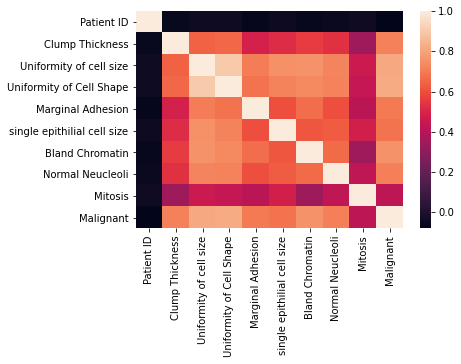

In [17]:
sns.heatmap(data.corr())

In [131]:
dropped_qmarks.corr()

,Patient ID,Clump Thickness,Uniformity of cell size,Uniformity of Cell Shape,Marginal Adhesion,single epithilial cell size,Bare Nuclei,Bland Chromatin,Normal Neucleoli,Mitosis,Malignant
Patient ID,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump Thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of cell size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
single epithilial cell size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Neucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitosis,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


<AxesSubplot:>

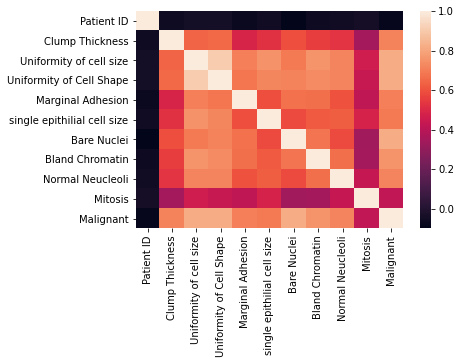

In [132]:
sns.heatmap(dropped_qmarks.corr())

In [27]:
data.dtypes

Patient ID                      int64
Clump Thickness                 int64
Uniformity of cell size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
single epithilial cell size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Neucleoli                int64
Mitosis                         int64
Malignant                       int64
dtype: object

<AxesSubplot:xlabel='Uniformity of cell size', ylabel='Uniformity of Cell Shape'>

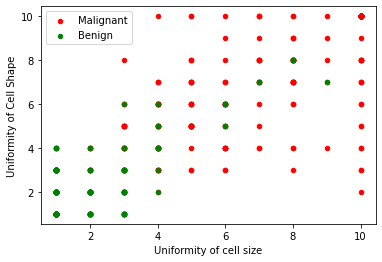

In [33]:
uniformity_group = data[['Uniformity of cell size' ,'Uniformity of Cell Shape', 'Malignant']]
ax = uniformity_group[uniformity_group.Malignant == 1].plot(kind = 'scatter', x = 'Uniformity of cell size', y = 'Uniformity of Cell Shape', label = 'Malignant', c = 'red')
uniformity_group[uniformity_group.Malignant == 0].plot(kind = 'scatter', x = 'Uniformity of cell size', y = 'Uniformity of Cell Shape', label = 'Benign', c = 'green', ax = ax)


from this we conclude that the greater the uniformity the more likely it is for a cell to have malignant cancer and we will therefore put it into out model. 

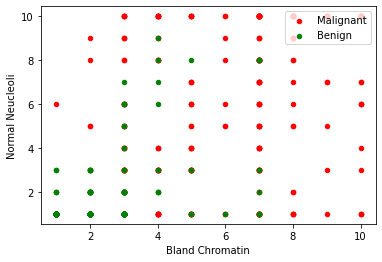

In [37]:
bland_data = data[['Bland Chromatin', 'Normal Neucleoli', 'Malignant']]
ax = bland_data[bland_data['Malignant'] == 1].plot(kind = 'scatter', x = 'Bland Chromatin', y = 'Normal Neucleoli', label = 'Malignant', c = 'red')
bland_data[bland_data['Malignant'] == 0].plot(ax = ax, kind = 'scatter', x = 'Bland Chromatin', y = 'Normal Neucleoli', label = 'Benign', c = 'green')
plt.legend(loc = 'upper right')

In [40]:
malignant_group_means = data.groupby('Malignant').mean()
malignant_group_means

,Patient ID,Clump Thickness,Uniformity of cell size,Uniformity of Cell Shape,Marginal Adhesion,single epithilial cell size,Bland Chromatin,Normal Neucleoli,Mitosis
Malignant,,,,,,,,,
0,1.107591e+06,2.956332,1.325328,1.443231,1.364629,2.120087,2.100437,1.290393,1.063319
1,1.003505e+06,7.195021,6.572614,6.560166,5.547718,5.298755,5.979253,5.863071,2.589212


In [52]:
import scipy.stats

for column in ['Clump Thickness', 
               'Uniformity of cell size','Uniformity of Cell Shape', 
               'Marginal Adhesion','single epithilial cell size', 
               'Bland Chromatin','Normal Neucleoli', 
               'Mitosis']:
    df_anova = data[['Malignant', column]]
    grouped_anova = df_anova.groupby(by = 'Malignant')
    anova_results = scipy.stats.f_oneway(grouped_anova.get_group(1)[column] , grouped_anova.get_group(0)[column])
    print('Significance of {}:{}'.format(column,anova_results))

Significance of Clump Thickness:F_onewayResult(statistic=733.2069784130817, pvalue=6.835565528041274e-111)
Significance of Uniformity of cell size:F_onewayResult(statistic=1408.527212789459, pvalue=1.747924499906127e-169)
Significance of Uniformity of Cell Shape:F_onewayResult(statistic=1419.3055301235904, pvalue=2.94562115784822e-170)
Significance of Marginal Adhesion:F_onewayResult(statistic=657.7936995867384, pvalue=1.1097566828535813e-102)
Significance of single epithilial cell size:F_onewayResult(statistic=608.7195553871196, pvalue=4.346160495522652e-97)
Significance of Bland Chromatin:F_onewayResult(statistic=933.2872966815166, pvalue=9.849140270228689e-131)
Significance of Normal Neucleoli:F_onewayResult(statistic=717.6280413528013, pvalue=3.124155254339221e-109)
Significance of Mitosis:F_onewayResult(statistic=152.0402389459221, pvalue=9.682098004464964e-32)


In [41]:
data.columns

Index(['Patient ID', 'Clump Thickness', 'Uniformity of cell size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'single epithilial cell size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Neucleoli', 'Mitosis', 'Malignant'],
      dtype='object')

In [115]:
import scipy.stats

for column in ['Clump Thickness', 
               'Uniformity of cell size','Uniformity of Cell Shape', 
               'Marginal Adhesion','single epithilial cell size', 
               'Bland Chromatin','Normal Neucleoli', 
               'Mitosis', 'Bare Nuclei']:
    df_anova = dropped_qmarks[['Malignant', column]]
    grouped_anova = df_anova.groupby(by = 'Malignant')
    anova_results = scipy.stats.f_oneway(grouped_anova.get_group(1)[column] , grouped_anova.get_group(0)[column])
    print('Significance of {}:{}'.format(column,anova_results))

Significance of Clump Thickness:F_onewayResult(statistic=711.4234463367795, pvalue=7.292503838464051e-108)
Significance of Uniformity of cell size:F_onewayResult(statistic=1406.1324695730186, pvalue=8.922226282440144e-168)
Significance of Uniformity of Cell Shape:F_onewayResult(statistic=1417.6438408647628, pvalue=1.369424922928629e-168)
Significance of Marginal Adhesion:F_onewayResult(statistic=677.8784002849594, pvalue=2.979777609009219e-104)
Significance of single epithilial cell size:F_onewayResult(statistic=622.1576809790222, pvalue=4.733539740953408e-98)
Significance of Bland Chromatin:F_onewayResult(statistic=921.0100147383681, pvalue=1.2677117916819452e-128)
Significance of Normal Neucleoli:F_onewayResult(statistic=727.4708050995358, pvalue=1.465645368096511e-109)
Significance of Mitosis:F_onewayResult(statistic=148.78768876839, pvalue=4.304039950942339e-31)
Significance of Bare Nuclei:F_onewayResult(statistic=1426.2402697371174, pvalue=3.401103273242638e-169)


from this we can actually conclude that bare nuclei has the biggest significance in terms of relating to cell malignance, we should therefore use bare Nuclei as a factor in out analysis.  

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


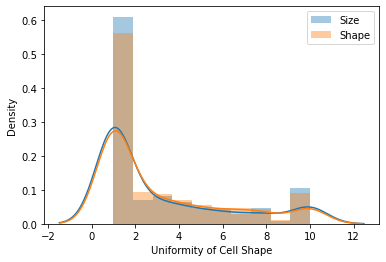

In [126]:
ax = sns.distplot(data['Uniformity of cell size'], label = 'Size')
sns.distplot(data['Uniformity of Cell Shape'], ax =ax, label = 'Shape')
plt.legend()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


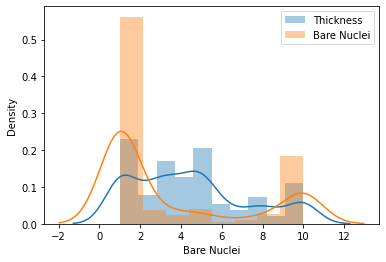

In [133]:
ax = sns.distplot(data['Clump Thickness'], label = 'Thickness')
sns.distplot(dropped_qmarks['Bare Nuclei'], ax =ax, label = 'Bare Nuclei')
plt.legend()

The top variables to have an influence on malignancy are Bare Nuclei, both uniformity of shape and size and finally, presence of bland chromatin

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


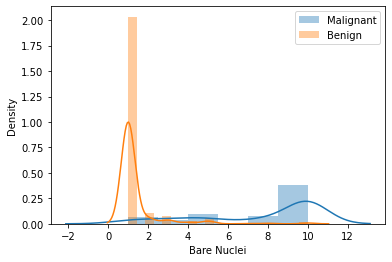

In [151]:
ax = sns.distplot(dropped_qmarks[dropped_qmarks['Malignant'] == 1]['Bare Nuclei'], label = 'Malignant')
sns.distplot(dropped_qmarks[dropped_qmarks['Malignant'] == 0]['Bare Nuclei'], label = 'Benign')
plt.legend()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


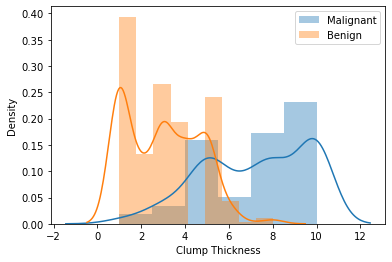

In [154]:
ax = sns.distplot(dropped_qmarks[dropped_qmarks['Malignant'] == 1]['Clump Thickness'], label = 'Malignant')
sns.distplot(dropped_qmarks[dropped_qmarks['Malignant'] == 0]['Clump Thickness'], label = 'Benign')
plt.legend()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


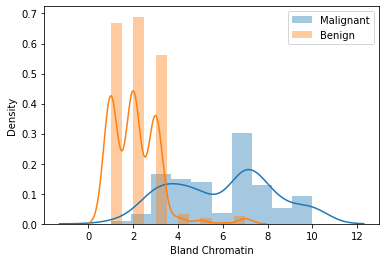

In [172]:
ax = sns.distplot(dropped_qmarks[dropped_qmarks['Malignant'] == 1]['Bland Chromatin'], label = 'Malignant')
sns.distplot(dropped_qmarks[dropped_qmarks['Malignant'] == 0]['Bland Chromatin'], label = 'Benign')
plt.legend()

showcased will be a logistic regression, a k nearest neighbors and a support vector machine

<h1> LINEAR REGRESSION </h1>

In [134]:
cancer_data = dropped_qmarks.copy()
cancer_data

,Patient ID,Clump Thickness,Uniformity of cell size,Uniformity of Cell Shape,Marginal Adhesion,single epithilial cell size,Bare Nuclei,Bland Chromatin,Normal Neucleoli,Mitosis,Malignant
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


In [169]:
x_data = cancer_data[['Uniformity of cell size','Uniformity of Cell Shape','Bare Nuclei', 'Bland Chromatin']]
y_data = cancer_data.Malignant


from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.2 , random_state = 0)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 0.01 , solver = 'liblinear').fit(x_train , y_train)

yhat = model.predict(x_test)
yhat_prob = model.predict_proba(x_test)

from sklearn.metrics import jaccard_score
print('Jaccard:',jaccard_score(y_test, yhat))
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, yhat))
from sklearn.metrics import log_loss
print('log loss:',log_loss(y_test,yhat_prob))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression() , x_train, y_train , cv = 3, scoring = 'accuracy')
print('Cross Validated Score: ',np.mean(scores))

print('\n' ,'Coefficients:', model.coef_)
print('Intercept: ',model.intercept_)


Jaccard: 0.8571428571428571
Accuracy: 0.9416058394160584
log loss: 0.37394900405314874
Cross Validated Score:  0.9633699633699634

 Coefficients: [[ 0.2372958   0.08952834  0.24003885 -0.23043659]]
Intercept:  [-0.8857073]


In [170]:
import statsmodels.api as sm

x = sm.add_constant(x_train)
reg_log = sm.Logit(y_train,x_train)
model_log = reg_log.fit()
results = model_log.summary()
results

Optimization terminated successfully.
         Current function value: 0.533303
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Malignant   No. Observations:                  546
Model:                          Logit   Df Residuals:                      542
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Jan 2021   Pseudo R-squ.:                  0.1732
Time:                        19:23:35   Log-Likelihood:                -291.18
converged:                       True   LL-Null:                       -352.19
Covariance Type:            nonrobust   LLR p-value:                 2.848e-26
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Uniformity of cell size      0.5480      0.105      5.238      0.000       0.343       0.753
Uniformity of Cell Shape    -0.0238      0.096     -0.248      0.804      -0.212       0.165
Bare Nuclei                  0.3539      0.053      6.705      0.000       0.250       0.457
Bland Chromatin             -0.6762      0.081     -8.313      0.000      -0.836      -0.517
============================================================================================
"""

Statistically speaking, the pvalue indicates uniformity of shape factor is insignificant, does getting rid of it improve out accuracy scores?

In [306]:
x_data = cancer_data[['Uniformity of cell size','Bare Nuclei', 'Bland Chromatin']]
y_data = cancer_data.Malignant


from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.2 , random_state = 0)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 0.01 , solver = 'liblinear').fit(x_train , y_train)

yhat = model.predict(x_test)
yhat_prob = model.predict_proba(x_test)

from sklearn.metrics import jaccard_score
print('Jaccard:',jaccard_score(y_test, yhat))
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, yhat))
from sklearn.metrics import log_loss
print('log loss:',log_loss(y_test,yhat_prob))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression() , x_train, y_train , cv = 3, scoring = 'accuracy')
print('Cross Validated Score: ',np.mean(scores))

print('\n' ,'Coefficients:', model.coef_)
print('Intercept: ',model.intercept_)

from sklearn.feature_selection import f_regression
print('\n', f_regression(x_data, y_data))



Jaccard: 0.8275862068965517
Accuracy: 0.927007299270073
log loss: 0.3788867199076536
Cross Validated Score:  0.9578754578754579

 Coefficients: [[ 0.2889262   0.25161915 -0.21130148]]
Intercept:  [-0.87868859]

 (array([1406.13246957, 1426.24026974,  921.01001474]), array([8.92222628e-168, 3.40110327e-169, 1.26771179e-128]))


Lets take a look at potential multicolinearity to make sure our vairables are not effecting one another in our end result, y:

We will do this using variance inflation factor.

'VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable.'

In [321]:
#check for multicolinearity using variance inflation factor, usually values of 7 or below are acceptable and have little multicolinearity with other variables.
#See the differecne between with and without uniformity of cell shape!
#VIF calculates ho much bigger the sum of square error is with multicolinearity vs when there is no multicolinearity
print(cancer_data.columns)

from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = cancer_data[['Uniformity of cell size','Bare Nuclei', 'Bland Chromatin', 'Normal Neucleoli']]

VIF = pd.DataFrame({'VIF': [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])], 'Features': variables.columns})
VIF

Index(['Patient ID', 'Clump Thickness', 'Uniformity of cell size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'single epithilial cell size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Neucleoli', 'Mitosis', 'Malignant'],
      dtype='object')


,VIF,Features
0,6.556135,Uniformity of cell size
1,4.236454,Bare Nuclei
2,6.189374,Bland Chromatin
3,4.243987,Normal Neucleoli


In [157]:
import statsmodels.api as sm

x = sm.add_constant(x_train)
reg_log = sm.Logit(y_train,x_train)
model_log = reg_log.fit()
results = model_log.summary()
results

Optimization terminated successfully.
         Current function value: 0.533359
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Malignant   No. Observations:                  546
Model:                          Logit   Df Residuals:                      543
Method:                           MLE   Df Model:                            2
Date:                Wed, 20 Jan 2021   Pseudo R-squ.:                  0.1731
Time:                        19:10:20   Log-Likelihood:                -291.21
converged:                       True   LL-Null:                       -352.19
Covariance Type:            nonrobust   LLR p-value:                 3.306e-27
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Uniformity of cell size     0.5302      0.075      7.025      0.000       0.382       0.678
Bare Nuclei                 0.3513      0.052      6.795      0.000       0.250       0.453
Bland Chromatin            -0.6794      0.080     -8.446      0.000      -0.837      -0.522
===========================================================================================
"""

Clearly the accuracy has been reduced quite considerably by removing that variable. Lets see what happens when we do a ridge regression: where variables with minor contribution have their coefficients close to zero. 

as alpha increases the underfitting of our model increases, conversly as alpha is reduced overfitting is increased.

In [182]:
x_data = cancer_data[['Uniformity of cell size','Uniformity of Cell Shape','Bare Nuclei', 'Bland Chromatin']]
y_data = cancer_data.Malignant


from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.2 , random_state = 0)

parameters = [{'alpha': [0.001,0.01,0.1,1,10,100,1000]}]

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

RR = Ridge()
grid1 = GridSearchCV(RR, parameters, cv = 4)
grid1.fit(x_data,y_data)
print(grid1.best_estimator_)
scores = grid1.cv_results_
scores['mean_test_score']

Ridge(alpha=100)


array([0.80077824, 0.8007783 , 0.80077882, 0.80078408, 0.80083503,
       0.80120709, 0.79889172])

From the ridge regression we have seen a vast reduction in our models overall accuracy which had an oriigional cross validated (due to cross validation we can be certain thier is reduced overfitting of our model)score of 0.96, thats the correct output for 96% of cancer cases which is critical for medical performance as lives are at stake. 

lets see what happens if we add any other variables such as Normal nucelei prescence. The problem with adding too many variables is data becomes overfit, so we need to be careful here. 

In [186]:
x_data = cancer_data[['Uniformity of cell size','Uniformity of Cell Shape','Bare Nuclei', 'Bland Chromatin', 'Normal Neucleoli']]
y_data = cancer_data.Malignant


from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.2 , random_state = 0)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 0.01 , solver = 'liblinear').fit(x_train , y_train)

yhat = model.predict(x_test)
yhat_prob = model.predict_proba(x_test)

from sklearn.metrics import jaccard_score
print('Jaccard:',jaccard_score(y_test, yhat))
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, yhat))
from sklearn.metrics import log_loss
print('log loss:',log_loss(y_test,yhat_prob))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression() , x_train, y_train , cv = 3, scoring = 'accuracy')
print('Cross Validated Score: ',np.mean(scores))

print('\n' ,'Coefficients:', model.coef_)
print('Intercept: ',model.intercept_)


Jaccard: 0.8421052631578947
Accuracy: 0.9343065693430657
log loss: 0.3840603854946553
Cross Validated Score:  0.9652014652014652

 Coefficients: [[ 0.23128088  0.23352864 -0.2563969   0.14358846]]
Intercept:  [-0.88388126]


In [187]:
import statsmodels.api as sm

x = sm.add_constant(x_train)
reg_log = sm.Logit(y_train,x_train)
model_log = reg_log.fit()
results = model_log.summary()
results

Optimization terminated successfully.
         Current function value: 0.522801
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Malignant   No. Observations:                  546
Model:                          Logit   Df Residuals:                      542
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Jan 2021   Pseudo R-squ.:                  0.1895
Time:                        20:17:55   Log-Likelihood:                -285.45
converged:                       True   LL-Null:                       -352.19
Covariance Type:            nonrobust   LLR p-value:                 9.627e-29
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Uniformity of cell size     0.4424      0.078      5.695      0.000       0.290       0.595
Bare Nuclei                 0.3368      0.052      6.461      0.000       0.235       0.439
Bland Chromatin            -0.7694      0.088     -8.704      0.000      -0.943      -0.596
Normal Neucleoli            0.2196      0.066      3.326      0.001       0.090       0.349
===========================================================================================
"""

accuracy, jaccard and log loss have been reduced here and the cross validated score is almost exactly the same as with just 4 variables.

we can see that again uniformity of shape is in significant. can we improve the model by getting rid of it and adding our new significant variable, Normal Neucleoli

In [189]:
x_data = cancer_data[['Uniformity of cell size','Bare Nuclei', 'Bland Chromatin', 'Normal Neucleoli']]
y_data = cancer_data.Malignant


from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size = 0.2 , random_state = 0)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 0.01 , solver = 'liblinear').fit(x_train , y_train)

yhat = model.predict(x_test)
yhat_prob = model.predict_proba(x_test)

from sklearn.metrics import jaccard_score
print('Jaccard:',jaccard_score(y_test, yhat))
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(y_test, yhat))
from sklearn.metrics import log_loss
print('log loss:',log_loss(y_test,yhat_prob))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression() , x_train, y_train , cv = 3, scoring = 'accuracy')
print('Cross Validated Score: ',np.mean(scores))

print('\n' ,'Coefficients:', model.coef_)
print('Intercept: ',model.intercept_)

import statsmodels.api as sm

x = sm.add_constant(x_train)
reg_log = sm.Logit(y_train,x_train)
model_log = reg_log.fit()
results = model_log.summary()
results


Jaccard: 0.8421052631578947
Accuracy: 0.9343065693430657
log loss: 0.3840603854946553
Cross Validated Score:  0.9652014652014652

 Coefficients: [[ 0.23128088  0.23352864 -0.2563969   0.14358846]]
Intercept:  [-0.88388126]
Optimization terminated successfully.
         Current function value: 0.522801
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Malignant   No. Observations:                  546
Model:                          Logit   Df Residuals:                      542
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Jan 2021   Pseudo R-squ.:                  0.1895
Time:                        20:20:28   Log-Likelihood:                -285.45
converged:                       True   LL-Null:                       -352.19
Covariance Type:            nonrobust   LLR p-value:                 9.627e-29
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Uniformity of cell size     0.4424      0.078      5.695      0.000       0.290       0.595
Bare Nuclei                 0.3368      0.052      6.461      0.000       0.235       0.439
Bland Chromatin            -0.7694      0.088     -8.704      0.000      -0.943      -0.596
Normal Neucleoli            0.2196      0.066      3.326      0.001       0.090       0.349
===========================================================================================
"""

we can see jaccard score and cross validated score have imporved and so this will be our prefered model.

The reasons for statsmodels and sklearn showing different coefficient results is becuase of the regularisation provided by sklearn code that enables us to reduce overfitting of the model. 

In [252]:
#practice predicting on the origional model with the highest cross val score
#variables to play with: 'Uniformity of cell size','Bare Nuclei', 'Bland Chromatin', 'Normal Neucleoli'
prediction = model.predict([[1,2,1,3]])
prediction
#this prediction is the threshold leading to cancer for all variables
#from our model we can see that having less bland chromatin increases cancer the most, followed by uniformity of cell shape, then having bare nuclei.

array([1])

<h1>Support vector machine</h1>

<AxesSubplot:xlabel='Uniformity of cell size', ylabel='Bare Nuclei'>

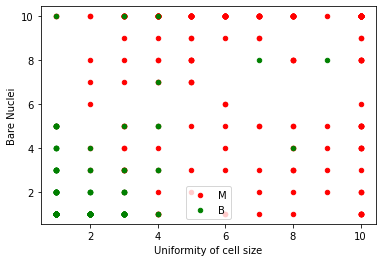

In [254]:
ax = cancer_data[cancer_data['Malignant'] == 1].plot(kind = 'scatter',x = 'Uniformity of cell size', y = 'Bare Nuclei', label = 'M', c = 'red')
cancer_data[cancer_data['Malignant'] == 0].plot(kind = 'scatter',x = 'Uniformity of cell size', y = 'Bare Nuclei', label = 'B', c = 'green', ax = ax)

<AxesSubplot:xlabel='Uniformity of cell size', ylabel='Uniformity of Cell Shape'>

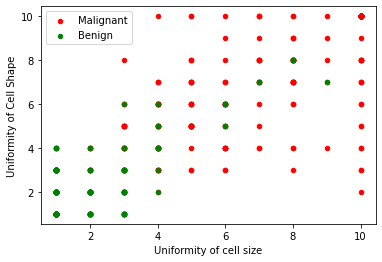

In [255]:
ax = uniformity_group[uniformity_group.Malignant == 1].plot(kind = 'scatter', x = 'Uniformity of cell size', y = 'Uniformity of Cell Shape', label = 'Malignant', c = 'red')
uniformity_group[uniformity_group.Malignant == 0].plot(kind = 'scatter', x = 'Uniformity of cell size', y = 'Uniformity of Cell Shape', label = 'Benign', c = 'green', ax = ax)

A svm is used as a classifying algorithm that works by separating data into classes via a 'separator'

In [266]:
x_data = cancer_data[['Uniformity of cell size','Bare Nuclei']]
y_data = cancer_data.Malignant

from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.2, random_state = 0)

from sklearn import svm

kernel_set = svm.SVC(kernel = 'rbf')
#
model = kernel_set.fit(x_train,y_train)

yhat = model.predict(x_test)

from sklearn.metrics import classification_report , confusion_matrix
print(confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat))
print(jaccard_score(y_test,yhat))
accuracy_score(y_test,yhat)

[[84  3]
 [ 3 47]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        87
           1       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

0.8867924528301887


0.9562043795620438

In [290]:
x_data = cancer_data[[ 'Marginal Adhesion','Clump Thickness','Uniformity of cell size','Uniformity of Cell Shape','Bare Nuclei', 'Bland Chromatin']]
y_data = cancer_data.Malignant

from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.2, random_state = 0)

from sklearn import svm

kernel_set = svm.SVC(kernel = 'rbf')
#
model = kernel_set.fit(x_train,y_train)

yhat = model.predict(x_test)

from sklearn.metrics import classification_report , confusion_matrix
print(confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat))
print(jaccard_score(y_test,yhat))
print(accuracy_score(y_test,yhat))

scores = cross_val_score(svm.SVC(kernel = 'rbf') , x_data, y_data , cv = 6, scoring = 'accuracy')
print('Cross Validated Score: ',np.mean(scores))

tn, fp, fn, tp = confusion_matrix(y_test, yhat).ravel()
(tn, fp, fn, tp)

[[85  2]
 [ 1 49]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        87
           1       0.96      0.98      0.97        50

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137

0.9423076923076923
0.9781021897810219
Cross Validated Score:  0.9707472959685349


(85, 2, 1, 49)

<h1>K NEAREST NEIGHBORS</h1>

In [391]:
x_data = cancer_data[['Marginal Adhesion','Clump Thickness','Uniformity of cell size','Bare Nuclei', 'Bland Chromatin']]
y_data = cancer_data.Malignant

from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.2, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier

ks = [1,2,3,4,5,6,7,8]
mean_acc = []
for n in ks:
    model = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat = model.predict(x_test)
    mean_acc.append(accuracy_score(y_test,yhat))

print('Best Score was:',max(mean_acc))
print('With K of:', mean_acc.index(max(mean_acc))+1)

Best Score was: 0.9781021897810219
With K of: 1
